# Plotting Exercises
## Data Handling and Visualisation
### University of Hertfordshire
**Student:** Cristina Baron Suarez <br>


# Problem 1

In this problem, we will create a dataset of random numbers that simulates the height of a random sample of adults following a normal distribution, and we will present the data in a single-panel figure. The following requirements need to be met:
1. Draw at least 300 points from a random number generator
2. Create a histogram of this data
3. Add an annotation to indicate the mean and median of the distribution

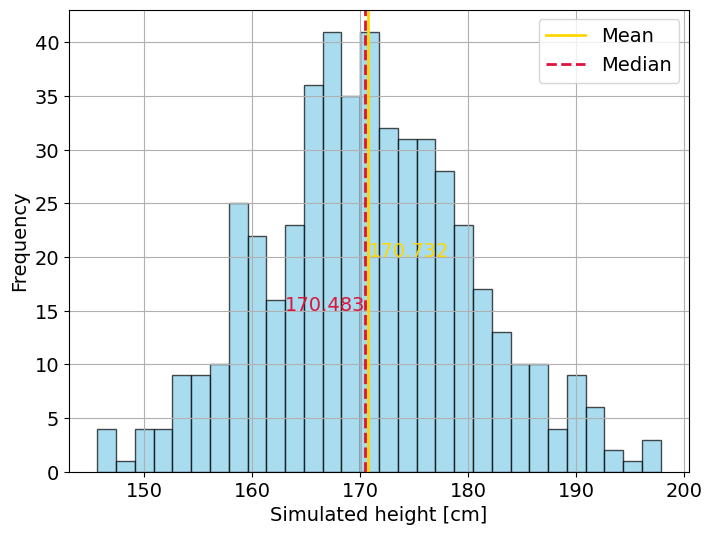

In [115]:
import numpy as np
import matplotlib.pyplot as plt

# Create a dataset of random numbers that simulates the height of a random sample of adults following a normal distribution
# mean = 170 cm, sd = 10 cm. 
np.random.seed(4) # Random seed for reproducibility
data = np.random.normal(loc = 170, scale = 10, size = 500)  # 500 random numbers

mean = np.mean(data)  # Calculates the sample mean
median = np.median(data)  # Calculates the sample median

# Histogram
plt.figure(figsize = (8, 6)) # Size of the figure
plt.hist(data, bins = 30, color = 'skyblue', edgecolor = 'black', alpha = 0.7) # Plots the histogram

# Mean and median
plt.axvline(mean, color = 'gold', linestyle = '-', linewidth = 2, label = 'Mean') # Vertical line to indicate the sample mean
plt.axvline(median, color = 'crimson', linestyle = '--', linewidth = 2, label = 'Median') # Vertical line to indicate the sample median
plt.text(mean + 0.1, 20, f'{mean:.3f}', color = 'gold', fontsize = 14) # Shows the sample mean value
plt.text(median - 7.5, 15, f'{median:.3f}', color = 'crimson', fontsize = 14) # Shows the sample median value

# Labels, ticks and legend
plt.xlabel('Simulated height [cm]', fontsize = 14) # Sets the label for the X-axis
plt.ylabel('Frequency', fontsize = 14) # Sets the label for the Y-axis
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(fontsize = 14)

# Adds a grid to the plot
plt.grid(True)

# Problem 2
In this problem, we will load data from the parquet file provided into Python, and we will make elegant plots presenting the data as thoroughly as possible.

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_parquet("exercises_problem2.parquet")
df.head()

,var1,var2,var3,class
0,2.220386,3.088938,5.309324,1
1,-1.112359,1.838144,0.725785,0
2,-0.687695,1.747231,1.059535,0
3,-2.875016,1.718303,-1.156714,0
4,-2.010930,1.327895,-0.683035,0


Let's display the three variables ('var1', 'var2' and 'var3') in a single plot. We will make use of 'PairGrid' in order to make pair combinations of numeric variables. On the other hand, the qualitative variable 'class' will give us the colors of the plot.

In [119]:
def pairGrid(df, df_vars, hue):
    """
    This function makes pair combinations of numeric variables.
    
    Parameters:
    - 'df': DataFrame to use
    - 'df_vars': the list of variables to combine
    - 'hue': name of the column in the DataFrame <df> whose values will be used to color-code the data points
    """
    # 'df_vars' specifies the variables to plot, using 'df' to access data for 'hue'
    # 'hue' colors the points based on their category
    g = sns.PairGrid(data = df, vars = df_vars, hue = hue)
    
    # Map a scatter plot to the grids of the PairGrid for each pair of variables
    g.map(plt.scatter, alpha = 0.25)
    
    # Add a legend to identify each hue category
    g.add_legend()
    return

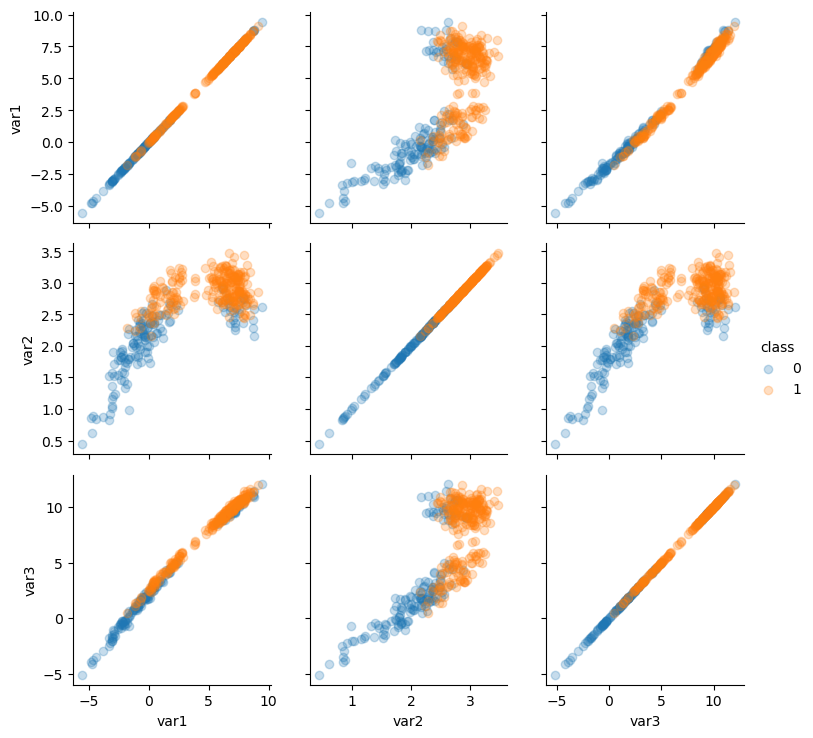

In [123]:
df_vars = df.drop(['class'], axis = 1).copy()
pairGrid(df, df_vars, 'class')

Apparently, 'var1' and 'var3' have a good linear relationship. Both 'var1' and 'var3' appear to have a parabolic relationship with 'var2'. In relation to'class', we can tell that the bigger the values of 'var2' are, the more chances we get to find data where 'class' is equal to 1. This is represented by orange dots.

In 'var1', the dots seem to be organized in two clusters. These are values smaller than 4, and values bigger than 5, approximately. Furthermore, we can also observe two clusters in 'var3'.

Below, we will further elaborate on the analysis.

## 'var1' VS 'var2'
Thanks to the previous plot, we can apparently appreciate a parabolic relationship between the first and second variables. For that reason, we are now going to adjust a second grade polynom.

In [126]:
def varX_vs_varY(df, axisX, axisY):
    """
    This function creates a scatter plot and computes y-values for the fitted line based on x-values.
    
    Parameters:
    - 'df': DataFrame to use
    - 'axisX': name of the column in the DataFrame <df> that represents the variable on the X-axis
    - 'axisY': name of the column in the DataFrame <df> that represents the variable on the Y-axis
    """
    # Plots a scatter plot using seaborn
    sns.scatterplot(data = df, x = axisX, y = axisY, marker = "o")

    # Calculate a polynomial fit of degree 2 for the variables specified by 'axisX' and 'axisY'
    # np.polyfit finds the coefficients of the best fit polynomial
    # np.poly1d creates a polynomial function from the coefficient array
    sns.lineplot(
        x = df[axisX], 
        y = np.poly1d(np.polyfit(df[axisX], df[axisY], 2))(df[axisX]), label = "Fitted model",
        color = "red")

    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.xlabel(axisX, fontsize = 14)
    plt.ylabel(axisY, fontsize = 14)
    plt.legend(fontsize = 14, title_fontsize = 14)
    return

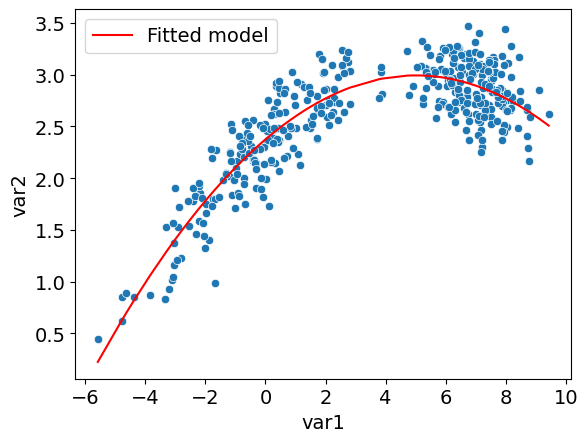

In [127]:
varX_vs_varY(df, 'var1', 'var2')

## 'var1' VS 'var3'
On the other hand, the relationship between 'var1' and 'var3' seems to be linear, but, after paying attention to the observations, we can tell they deviate from a straight line.

In [129]:
def linearPlot(df, x, y):
    """
    This function creates a scatter plot with a linear regression fit line in color red.
    
    Parameters:
    - 'data': DataFrame to use
    - 'x': name of the column in the DataFrame <data> that represents the variable on the X-axis
    - 'y': name of the column in the DataFrame <data> that represents the variable on the Y-axis
    """
    sns.lmplot(data = df, x = x, y = y,  markers = ".", line_kws = {'color': 'red'})

    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.xlabel(x, fontsize = 14)
    plt.ylabel(y, fontsize = 14)
    plt.show()
    return

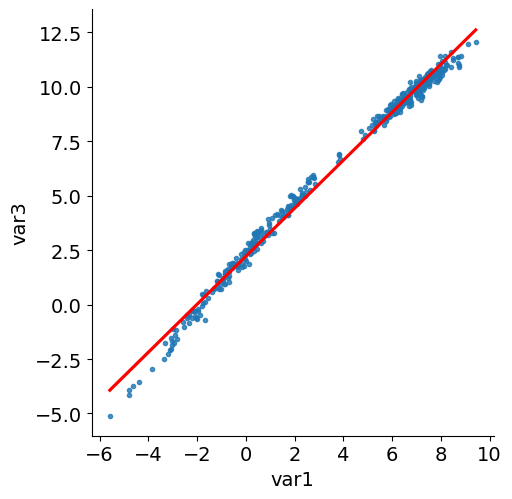

In [130]:
linearPlot(df, 'var1', 'var3')

Let's now try a parabolic regression:

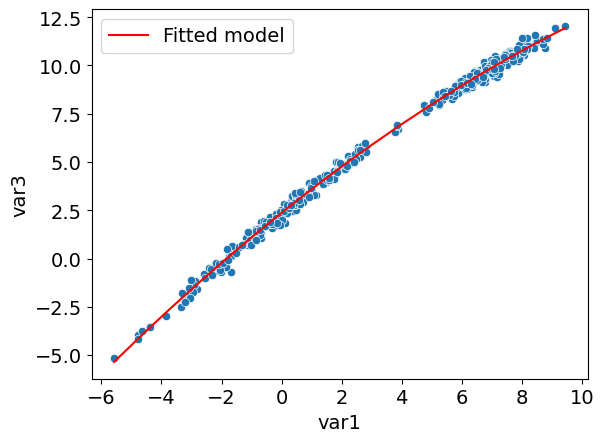

In [132]:
varX_vs_varY(df, 'var1', 'var3')

The parabolic fit appears to be a better option for estimating 'var3' from 'var1'. Previously, we observed how 'var2' seemed to undergo a parabolic transformation from 'var1'. Then, maybe 'var3' can be obtained from a linear combination between 'var1' and 'var2'.

Let's check if the assert var3 = var1 + var2 is true.

In [135]:
df['difference'] = df['var3'] - (df['var1'] + df['var2'])
print(max(abs(df['difference'])))

5.1514348342607263e-14


The difference between 'var3' and ('var1' + 'var2') is almost 0. This confirms that 'var3' is almost the same as the sum between 'var1' and 'var2', except for small variations. To put it another way, we can say that 'var3' is correlated with the result of the addition between 'var1' and 'var2'. That is to say, we can express 'var3' through ('var1' + 'var2'). This means that we can get rid of the variable 'var3'. For this reason, from now on, 'var3' does not need to be studied since it is already solved.

## Studying 'var1', 'var2' and 'class'
'var1' and 'var2' are the only variables that we really need to study. For that reason, we will show them altoguether in a scatterplot, using 'var1' for the X-axis, and 'var2' for the Y-axis. We will assign a different color depending on the value of 'class'.

In [138]:
def scatterPlot(data, x, y, hue):
    """
    This function creates a scatter plot using seaborn, and the points are assigned a different color depending on the value of <hue>.
    
    Parameters:
    - 'data': DataFrame to use
    - 'x': name of the column in the DataFrame <data> that represents the variable on the X-axis
    - 'y': name of the column in the DataFrame <data> that represents the variable on the Y-axis
    - 'hue': name of the column in the DataFrame <data> whose values will be used to color-code the data points
    """
    sns.scatterplot(data = data, x = x, y = y, hue = hue, marker = "o")
    
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.xlabel(x, fontsize = 14)
    plt.ylabel(y, fontsize = 14)
    plt.legend(title = hue, fontsize = 14, title_fontsize = 14)
    plt.show()
    return

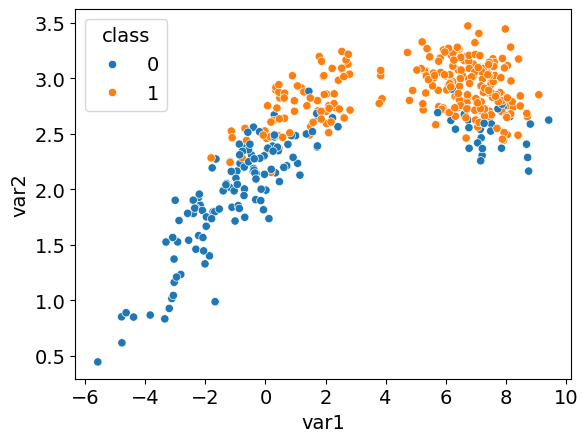

In [139]:
scatterPlot(df, 'var1', 'var2', 'class')

In the plot above we can see the parabolic relationship between 'var1' and 'var2'. The points are grouped into two fairly well-separated clusters. Moreover, we can also tell that the points where 'class' is equal to 1 belong to high values of 'var2', so that as the values of 'var2' get bigger, the chances of finding a point that belongs to 'class = 1' increases.

Let's study this probability.

In [141]:
def plot_class_proportion_by_interval(df, var, classes, bins = 6):
    """
    This function creates a plot for each class in order to study the distribution of the numerical variable <var>.

    Parameters:
    - 'df': The DataFrame to use
    - 'var': The variable to study
    - 'classes': A list of the different types of classes
    - 'bins': The number of bins we want to use for the plot. 6 by default
    """
    # Calculate <var>'s minimum and maximum values
    x_min = df[var].min()
    x_max = df[var].max()
    
    plt.figure(figsize = (10, 5))

    for i in classes:
        plt.subplot(1, len(classes), i+1) # Create a single row of subplots, one for each class
        
        # Plot a histogram of the variable <var> for the 'class' being studied, and overlay a density curve
        sns.histplot(df[df['class'] == i][var], bins = bins, kde = True, binrange = (x_min, x_max))
        plt.title(f'Class = {i}', fontsize = 16)
        plt.xlabel(var, fontsize = 14)
        plt.ylabel('Count', fontsize = 14)
        plt.xticks(fontsize = 14)
        plt.yticks(fontsize = 14)
        plt.xlim(x_min, x_max)
        plt.ylim(0, 200)
      
    plt.tight_layout() # Adjust the spacing between the plots
    plt.show()
    return

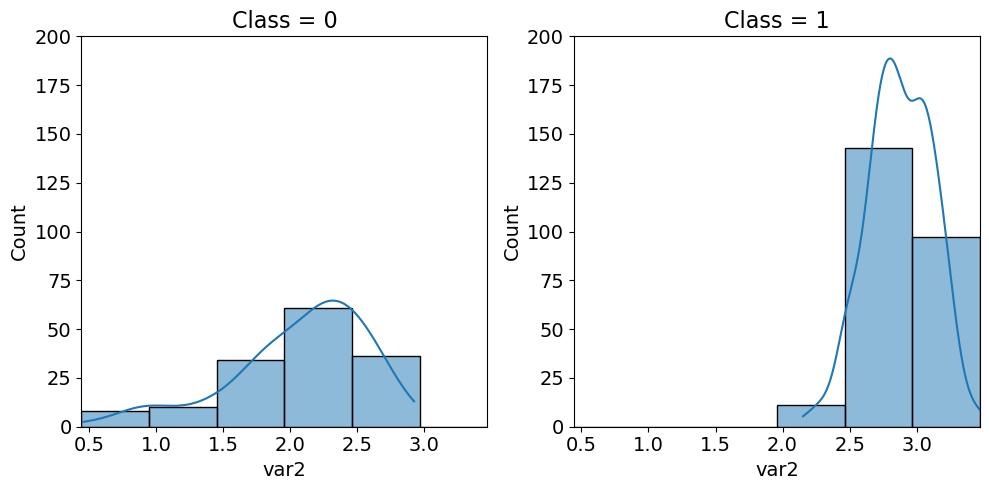

In [144]:
classes = df['class'].unique() # Get the different classes
plot_class_proportion_by_interval(df, 'var2', classes)

Apparently, for values of 'var2' less than 2, the 'class' variable is always 0. For values slightly above 3, 'class' is always 1. Between these values, the proportion of 'class' being 1 increases with the value of 'var2'.

## Clusters according to var1
Let's recall that, depending of the values of 'var1', the points are organized in two clusters. Let's show an histogram where only 'var1' is being studied.

In [149]:
def plotHistogram_var(var, bins = 25):
    """
    This function plots a histogram for the specified variable.

    Parameters:
    - 'var': The variable for which the histogram is plotted
    - 'bins': Amount of bins we want to use for the plot. 25 by default
    """
    # Plot the histogram with 25 bins and black edges (if the number of bins to create have not been especified in the parameters)
    plt.hist(var, bins = bins, color = 'skyblue', edgecolor = 'black')
    
    plt.xlabel('Value', fontsize = 14)
    plt.ylabel('Frequency', fontsize = 14)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.grid(alpha = 0.7)
    plt.title(var.name, fontsize = 16)
    plt.show()
    return

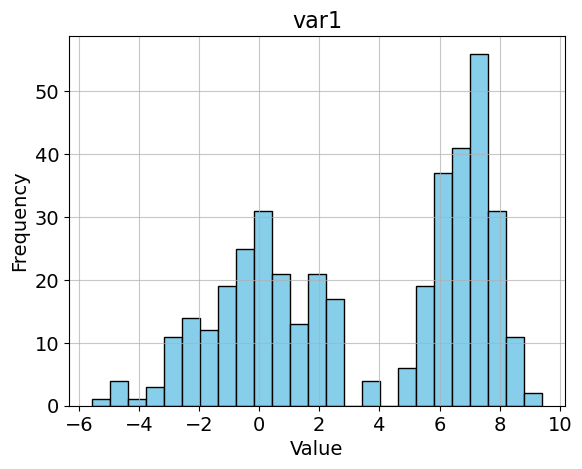

In [151]:
plotHistogram_var(df['var1'])

## Conclusions
Since we do not know the meanings of 'var1', 'var2', 'var3', we assume they describe a scientific experiment involving numerical variables ('var1', 'var2' and 'var3') and a binary variable ('class') representing the state of the system. Based on this interpretation, we reach the following conclusions:

- **var1** is the primary variable that influences the entire system. It serves as the foundational element for the experiment's dynamics. It is probably the independent variable of the experiment. It is observed in two clusters.

- **var2** depends quadratically on 'var1', although it includes some random errors.

- **var3** is defined as the sum of 'var1' and 'var2', without any associated errors.

- **class** represents the system's state and is influenced by 'var2'. The relationship suggests that higher values of 'var2' correspond to an increased probability of the system being in state 1. However, this probability is not a linear function and requires further determination to characterize its exact dependency.